<a href="http://tinypic.com?ref=s688wi" target="_blank"><img src="http://i67.tinypic.com/s688wi.jpg" border="0" alt="Image and video hosting by TinyPic"></a>

# Synopsis  

bigquery-public-data.hacker_news.full

# Query commands
For standard SQL in BigQuery, use 
```
#standardSQL
SELECT
FROM
```

For SQL query from CLI, don't use any of the hash comment
```
# From the CLI window
bq query --use_legacy_sql=false 'SELECT FROM `table`'

# In jupyter notebook
!bq query --use_legacy_sql=false 'SELECT FROM `table`'

# To return 1 millions rows if necessary 
bq query --use_legacy_sql=false --max_rows=1000000 'SELECT FROM `table`' 

# To save the result in csv file
bq query --use_legacy_sql=false --max_rows=1000000 --format=csv 'SELECT FROM `table`' > myfile.csv
```

In [95]:
# Importing Python Libraries

import redis
import numpy as np
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt
%matplotlib inline

# Number of rows

In [16]:
!bq query --use_legacy_sql=false \
'SELECT COUNT(*) \
FROM `bigquery-public-data.hacker_news.full`' 

Waiting on bqjob_r25bcc4fd55d74cec_00000164853cb026_1 ... (0s) Current status: DONE   
+----------+
|   f0_    |
+----------+
| 17108307 |
+----------+


# Types of Texts

In [17]:
!bq query --use_legacy_sql=false \
'SELECT type, COUNT(*) as total_count \
FROM `bigquery-public-data.hacker_news.full` \
GROUP BY type'

Waiting on bqjob_r5314ae97773d0bb7_00000164853cc7d7_1 ... (0s) Current status: DONE   
+---------+-------------+
|  type   | total_count |
+---------+-------------+
| comment |    14136753 |
| story   |     2947287 |
| job     |       10620 |
| pollopt |       11909 |
| poll    |        1738 |
+---------+-------------+


# Number of Users

In [18]:
!bq query --use_legacy_sql=false \
'SELECT COUNT(DISTINCT t1.by) as Number_of_Users \
FROM `bigquery-public-data.hacker_news.full` t1'

Waiting on bqjob_r6166ca1ac9b61afa_00000164853d117f_1 ... (0s) Current status: DONE   
+-----------------+
| Number_of_Users |
+-----------------+
|          524637 |
+-----------------+


# Result
There were 17 millions from the public dataset and 5 types of comments were found;  
    (1) comment,  
    (2) story,  
    (3) job,   
    (4) pollopt and   
    (5) poll.   

Out of 17 millions, 14 millions are comments and tops the list. Total number of comments contributing to 17 millions posts are half a million (524,637) commenters. 

# List of most commenters in HackerNews

In [19]:
!bq query --use_legacy_sql=false \
'SELECT t1.by as User, COUNT(*) as total_post \
FROM `bigquery-public-data.hacker_news.full` as t1 \
GROUP BY t1.by \
ORDER BY total_post DESC \
LIMIT 10'

Waiting on bqjob_r570afb1bcd3d116a_00000164853e1e21_1 ... (0s) Current status: DONE   
+--------------+------------+
|     User     | total_post |
+--------------+------------+
|              |     541464 |
| tptacek      |      45249 |
| jacquesm     |      34156 |
| dragonwriter |      24017 |
| rbanffy      |      23957 |
| dang         |      21636 |
| DanBC        |      20514 |
| pjmlp        |      19083 |
| icebraining  |      18056 |
| mikeash      |      17968 |
+--------------+------------+


### Result 
The user named 'tptacek' commented 45,249 posts, which is the highest posts in our data analysis. Since there are empty rows for **text** column, I checked total number of comments posted by each user. 

# List of Top most commenters with actual comments

In [21]:
!bq query --use_legacy_sql=false \
'SELECT t1.by as users, COUNT(*) as total_comments \
FROM `bigquery-public-data.hacker_news.full` as t1 \
WHERE t1.text <> "" \
GROUP BY t1.by \
ORDER BY total_comments DESC \
LIMIT 10'

Waiting on bqjob_r18038bc1eac10e53_000001648540a1bd_1 ... (0s) Current status: DONE   
+--------------+----------------+
|    users     | total_comments |
+--------------+----------------+
| tptacek      |          44879 |
| jacquesm     |          32463 |
| dragonwriter |          24013 |
| dang         |          21474 |
| DanBC        |          19281 |
| pjmlp        |          18704 |
| icebraining  |          18025 |
| mikeash      |          17962 |
| coldtea      |          17662 |
| rayiner      |          16043 |
+--------------+----------------+


### Result
I found the top most commenter **tptacek** posts reduced from 45,249 to 44,879, accounting for 370 deficits in empty row. To make sure if each user has a fixed empty rows, I also checked the second most commenter **jacquesm** whose posts decreased from 34,156 to 32,463 which gave me 1,693 empty text rows. It appears many different users had different amount of empty rows for some reasons. 

In [73]:
! bq query --use_legacy_sql=false \
'SELECT \
t1.by as user, \
SUM(CASE WHEN (t1.type ="comment") THEN 1 END) as comment, \
SUM(CASE WHEN (t1.type ="story") THEN 1 END) as story, \
SUM(CASE WHEN (t1.type ="job") THEN 1 END) as job, \
SUM(CASE WHEN (t1.type ="pollopt") THEN 1 END) as pollopt, \
SUM(CASE WHEN (t1.type ="poll") THEN 1 END) as poll, \
COUNT(*) as Total \
FROM `bigquery-public-data.hacker_news.full` as t1 \
WHERE t1.text <> "" \
GROUP BY t1.by \
ORDER BY Total DESC \
LIMIT 10'

Waiting on bqjob_r2f189981223a6c33_0000016487089f37_1 ... (0s) Current status: DONE   
+--------------+---------+-------+------+---------+------+-------+
|     user     | comment | story | job  | pollopt | poll | Total |
+--------------+---------+-------+------+---------+------+-------+
| tptacek      |   44861 |     7 | NULL |      10 |    1 | 44879 |
| jacquesm     |   32063 |   142 | NULL |     232 |   26 | 32463 |
| dragonwriter |   24013 |  NULL | NULL |    NULL | NULL | 24013 |
| dang         |   21434 |    17 | NULL |      22 |    1 | 21474 |
| DanBC        |   19250 |    21 | NULL |       8 |    2 | 19281 |
| pjmlp        |   18702 |     2 | NULL |    NULL | NULL | 18704 |
| icebraining  |   18024 |     1 | NULL |    NULL | NULL | 18025 |
| mikeash      |   17962 |  NULL | NULL |    NULL | NULL | 17962 |
| coldtea      |   17659 |     3 | NULL |    NULL | NULL | 17662 |
| rayiner      |   16041 |     2 | NULL |    NULL | NULL | 16043 |
+--------------+---------+-------+------+-

```
+--------------+---------+-------+------+---------+------+-------+
|     user     | comment | story | job  | pollopt | poll | Total |
+--------------+---------+-------+------+---------+------+-------+
| tptacek      |   44861 |     7 | NULL |      10 |    1 | 44879 |
| jacquesm     |   32063 |   142 | NULL |     232 |   26 | 32463 |
| dragonwriter |   24013 |  NULL | NULL |    NULL | NULL | 24013 |
| dang         |   21434 |    17 | NULL |      22 |    1 | 21474 |
| DanBC        |   19250 |    21 | NULL |       8 |    2 | 19281 |
| pjmlp        |   18702 |     2 | NULL |    NULL | NULL | 18704 |
| icebraining  |   18024 |     1 | NULL |    NULL | NULL | 18025 |
| mikeash      |   17962 |  NULL | NULL |    NULL | NULL | 17962 |
| coldtea      |   17659 |     3 | NULL |    NULL | NULL | 17662 |
| rayiner      |   16041 |     2 | NULL |    NULL | NULL | 16043 |
+--------------+---------+-------+------+---------+------+-------+
```

### CASE WHEN usage

CASE WHEN ... THEN is similar to if then conept. You specify the conditions 'CASE', and if the condition is met, you gives the value; integer or string. For eg, CASE WHEN t1.name = 'Kenneth' THEN 'yes'. This is a string. Since we're counting, we give the integer which makes 'SUM' usable in this situation.

### Result

It's interesting to know that some users are involved in all types of posts while others are actively involved in comments post only.

# Active across all posts 

Since there are 5 types of texts, I checked if users are actively involved in all 5 types of texts and if they are, in which type they are actively involved. Using the 5 tables join to clearly show each user participation in each type, I was able to illustrate users are mostly active in 'comments' type of texts. 

In [29]:
! bq query --use_legacy_sql=false \
'SELECT \
t1.by as user, \
t2.total_number as comment, \
t3.total_number as story, \
t1.total_number as job, \
t4.total_number as pollopt, \
t5.total_number as poll, \
t1.total_number + t2.total_number + t3.total_number + t4.total_number + t5.total_number as total \
FROM \
(SELECT t1.by, COUNT(*) as total_number \
FROM `bigquery-public-data.hacker_news.full` as t1 \
where t1.type = "job" AND t1.text <> "" \
GROUP BY t1.by) as t1 \
JOIN \
(SELECT t1.by, COUNT(*) as total_number \
FROM `bigquery-public-data.hacker_news.full` as t1 \
WHERE t1.type = "comment" AND t1.text <> "" \
GROUP BY t1.by) as t2 \
ON t1.by = t2.by \
JOIN \
(SELECT t1.by, COUNT(*) as total_number \
FROM `bigquery-public-data.hacker_news.full` as t1 \
WHERE t1.type = "story" AND t1.text <> "" \
GROUP BY t1.by) as t3 \
ON t3.by = t1.by \
JOIN \
(SELECT t1.by, COUNT(*) as total_number \
FROM `bigquery-public-data.hacker_news.full` as t1 \
WHERE t1.type = "pollopt" AND t1.text <> "" \
GROUP BY t1.by) as t4 \
ON t4.by = t1.by \
JOIN \
(SELECT t1.by, COUNT(*) as total_number \
FROM `bigquery-public-data.hacker_news.full` as t1 \
WHERE t1.type = "poll" AND t1.text <> "" \
GROUP BY t1.by) as t5 \
ON t5.by = t1.by \
ORDER BY total DESC \
LIMIT 10'

Waiting on bqjob_r7c819cf85bb01ba5_000001648654a231_1 ... (10s) Current status: DONE   
+--------------+---------+-------+-----+---------+------+-------+
|     user     | comment | story | job | pollopt | poll | total |
+--------------+---------+-------+-----+---------+------+-------+
| mattmaroon   |    4674 |     5 |   2 |       3 |    1 |  4685 |
| pclark       |    2309 |    26 |   2 |       7 |    2 |  2346 |
| abstractbill |    1429 |    13 |   5 |      19 |    1 |  1467 |
| lacker       |    1280 |     4 |   5 |      51 |    9 |  1349 |
| il           |     670 |    11 |   6 |       3 |    1 |   691 |
| bradgessler  |     559 |     2 |   1 |      10 |    1 |   573 |
| bkrausz      |     368 |    14 |   1 |       7 |    2 |   392 |
| dsugarman    |     360 |     1 |   1 |       6 |    2 |   370 |
| petenixey    |     302 |    15 |   1 |      24 |    2 |   344 |
| myoung8      |     291 |    35 |   5 |       4 |    1 |   336 |
+--------------+---------+-------+-----+---------+----

```
+--------------+---------+-------+-----+---------+------+-------+
|     user     | comment | story | job | pollopt | poll | total |
+--------------+---------+-------+-----+---------+------+-------+
| mattmaroon   |    4674 |     5 |   2 |       3 |    1 |  4685 |
| pclark       |    2309 |    26 |   2 |       7 |    2 |  2346 |
| abstractbill |    1429 |    13 |   5 |      19 |    1 |  1467 |
| lacker       |    1280 |     4 |   5 |      51 |    9 |  1349 |
| il           |     670 |    11 |   6 |       3 |    1 |   691 |
| bradgessler  |     559 |     2 |   1 |      10 |    1 |   573 |
| bkrausz      |     368 |    14 |   1 |       7 |    2 |   392 |
| dsugarman    |     360 |     1 |   1 |       6 |    2 |   370 |
| petenixey    |     302 |    15 |   1 |      24 |    2 |   344 |
| myoung8      |     291 |    35 |   5 |       4 |    1 |   336 |
+--------------+---------+-------+-----+---------+------+-------+
```

### Result
User named "mattmaroon" is actively involved in all types of texts in HackerNews. The user was involved in 4,674 comments, 5 posts in story, 2 posts in job, 3 posts in pollopt and 1 in poll, accounting for 4,685 posts in total. In contrast to our previous results where the most highly posted user 'tptacek' who made 44,879 posts did not show up in our 'across-the-board' analysis. This indicates that some users are not involved in other aspects of HackerNews and some users are only involved in certain types of posts. 

In [34]:
!bq query --use_legacy_sql=false \
--format=csv \
'SELECT t1.by, t1.type, t1.time, t1.timestamp, t1.text \
FROM `bigquery-public-data.hacker_news.full` as t1 \
WHERE t1.type ="story" AND t1.by = "mattmaroon" AND t1.text <> ""' > hackernews.csv

Waiting on bqjob_r2b80a39216c62535_0000016486bd7417_1 ... (2s) Current status: DONE   

In [36]:
mattmaroon_story = pd.read_csv("hackernews.csv")

In [37]:
mattmaroon_story.head()

,by,type,time,timestamp,text
0,mattmaroon,story,1193801557,2007-10-31 03:32:37,What do you think? We're still twiddling with ...
1,mattmaroon,story,1335203136,2012-04-23 17:45:36,A long time ago I wrote a couple blog posts wi...
2,mattmaroon,story,1210132349,2008-05-07 03:52:29,Is Google Reader bugging out today or is it ju...
3,mattmaroon,story,1222141435,2008-09-23 03:43:55,In order to help alleviate the perceived probl...
4,mattmaroon,story,1206771527,2008-03-29 06:18:47,"Maybe it's just me being my curmudgeonly self,..."


# Checking the user mattmaroon story comment

In [41]:
mattmaroon_story['text'][1]

"A long time ago I wrote a couple blog posts with advice for people who were applying/interviewing for Y Combinator. They still get quite a bit of traction every 6 months when it comes time for the latest YC batch. Every time a few intrepid founders just personally email to ask a few more questions.<p>Inspired by that and patio11's ama from a few months ago (which I hope you took him up on) I decided I'd throw my hat in the ring. If you are a prospective YC startup, feel free to email me at matt@bluefroggaming.com with questions. I'll do my best to help. I'll keep any conversations private unless you agree otherwise.<p>Also if you want a public answer, comment here.<p>Edit: This post is the main one: http://mattmaroon.com/2007/10/19/advice-for-y-combinator-interviewees/"

Using the "Pivot Table" 
SUM(CASE WHEN ()) command, it's much easier to dig the data

In [87]:
! bq query --use_legacy_sql=false \
--format=csv \
' SELECT \
EXTRACT(YEAR FROM t1.timestamp) as year, \
COUNT(*) as total_post \
FROM `bigquery-public-data.hacker_news.full` as t1 \
WHERE t1.text <> "" \
GROUP BY year \
ORDER BY year DESC' > yearly_posts.csv

Waiting on bqjob_rf3ad7198eb9631b_00000164873c656a_1 ... (7s) Current status: DONE   

In [88]:
yearly_posts = pd.read_csv('yearly_posts.csv')

In [89]:
display(yearly_posts)

,year,total_post
0,2018,903529
1,2017,2316001
2,2016,2054156
3,2015,1614849
4,2014,1492540
5,2013,1650868
6,2012,1259760
7,2011,1067420
8,2010,849930
9,2009,499389


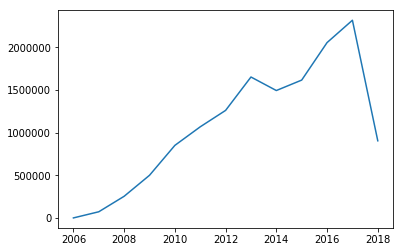

In [98]:
x = year[1:]
y = yearly_post[1:]
plt.plot(yearly_posts['year'], yearly_posts['total_post'])

### Result
Since HackerNews was launched in 2007, the graph shows that the number post gradually went up and peaked at 1.65 million posts in 2013 and dipped at 1.5 million posts. The total posts went up and it now reached above 2 millions. Since we are still in 2018, the number of posts at 2018 is not reflective. 

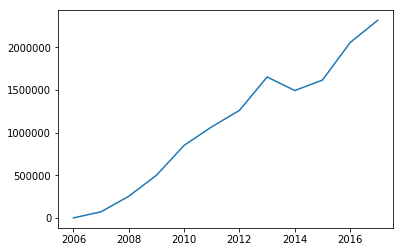

In [150]:
# Remove the year 2018 since it's still ongoing
x = yearly_posts['year'][1:]
y = yearly_posts['total_post'][1:]
plt.plot(x, y)

In [121]:
! bq query --use_legacy_sql=false \
--format=csv \
'SELECT \
EXTRACT(YEAR FROM t1.timestamp) as year, \
SUM(CASE WHEN EXTRACT(MONTH FROM t1.timestamp) = 1 THEN 1 END) as January, \
SUM(CASE WHEN EXTRACT(MONTH FROM t1.timestamp) = 2 THEN 1 END) as February, \
SUM(CASE WHEN EXTRACT(MONTH FROM t1.timestamp) = 3 THEN 1 END) as March, \
SUM(CASE WHEN EXTRACT(MONTH FROM t1.timestamp) = 4 THEN 1 END) as April, \
SUM(CASE WHEN EXTRACT(MONTH FROM t1.timestamp) = 5 THEN 1 END) as May, \
SUM(CASE WHEN EXTRACT(MONTH FROM t1.timestamp) = 6 THEN 1 END) as June, \
SUM(CASE WHEN EXTRACT(MONTH FROM t1.timestamp) = 7 THEN 1 END) as July, \
SUM(CASE WHEN EXTRACT(MONTH FROM t1.timestamp) = 8 THEN 1 END) as August, \
SUM(CASE WHEN EXTRACT(MONTH FROM t1.timestamp) = 9 THEN 1 END) as September, \
SUM(CASE WHEN EXTRACT(MONTH FROM t1.timestamp) = 10 THEN 1 END) as October, \
SUM(CASE WHEN EXTRACT(MONTH FROM t1.timestamp) = 11 THEN 1 END) as November, \
SUM(CASE WHEN EXTRACT(MONTH FROM t1.timestamp) = 12 THEN 1 END) as December, \
COUNT(*) as total_post \
FROM `bigquery-public-data.hacker_news.full` as t1 \
WHERE t1.text <> "" \
GROUP BY year \
ORDER BY year DESC' > monthly_posts.csv

Waiting on bqjob_r1b92362f6391aad8_0000016489c8455f_1 ... (8s) Current status: DONE   

In [122]:
monthly_posts = pd.read_csv('monthly_posts.csv')

In [123]:
monthly_posts.head()

,year,January,February,March,April,May,June,July,August,September,October,November,December,total_post
0,2018,198665.0,177218.0,200881.0,202569.0,124196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,903529
1,2017,204546.0,187091.0,208561.0,189326.0,185543.0,181944.0,186955.0,210802.0,195386.0,186273.0,188871.0,190703.0,2316001
2,2016,153470.0,155270.0,165793.0,168085.0,172166.0,167963.0,154628.0,168319.0,179520.0,189879.0,196903.0,182160.0,2054156
3,2015,125586.0,117592.0,141586.0,135462.0,136281.0,141046.0,143461.0,134144.0,126601.0,141162.0,135815.0,136113.0,1614849
4,2014,136969.0,133864.0,151389.0,142274.0,122979.0,114502.0,120970.0,107600.0,114089.0,120974.0,110871.0,116059.0,1492540


In [124]:
monthly_posts = monthly_posts[1:]

In [125]:
monthly_posts.head()

,year,January,February,March,April,May,June,July,August,September,October,November,December,total_post
1,2017,204546.0,187091.0,208561.0,189326.0,185543.0,181944.0,186955.0,210802.0,195386.0,186273.0,188871.0,190703.0,2316001
2,2016,153470.0,155270.0,165793.0,168085.0,172166.0,167963.0,154628.0,168319.0,179520.0,189879.0,196903.0,182160.0,2054156
3,2015,125586.0,117592.0,141586.0,135462.0,136281.0,141046.0,143461.0,134144.0,126601.0,141162.0,135815.0,136113.0,1614849
4,2014,136969.0,133864.0,151389.0,142274.0,122979.0,114502.0,120970.0,107600.0,114089.0,120974.0,110871.0,116059.0,1492540
5,2013,127706.0,125192.0,138687.0,135286.0,136788.0,136031.0,140615.0,141988.0,136840.0,147264.0,144425.0,140046.0,1650868


# Histogram with overlapped bars

In [174]:
x_year = monthly_posts['year']

In [179]:
january = monthly_posts['January']
february = monthly_posts['February']
march = monthly_posts['March']
april = monthly_posts['April']
may = monthly_posts['May']
june = monthly_posts['June']
july = monthly_posts['July']
august = monthly_posts['August']
september = monthly_posts['September']
october = monthly_posts['October']
november = monthly_posts['November']
december = monthly_posts['December']
months = [january, february, march, april, may, june, july, august, september, october, november, december]

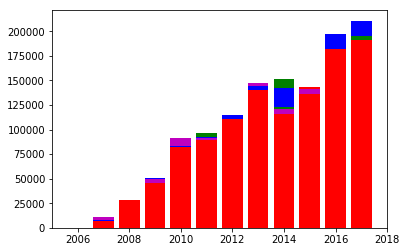

In [178]:
plt.bar(x_year, january, color='b')
plt.bar(x_year, february, color='r')
plt.bar(x_year, march, color='g')
plt.bar(x_year, april, color='b')
plt.bar(x_year, may, color='g')
plt.bar(x_year, june, color='b')
plt.bar(x_year, july, color='r')
plt.bar(x_year, august, color= 'b')
plt.bar(x_year, september, color='g')
plt.bar(x_year, october, color='m')
plt.bar(x_year, november, color='b')
plt.bar(x_year, december, color='r')
plt.show()

TypeError: __init__() got an unexpected keyword argument 'figuresize'

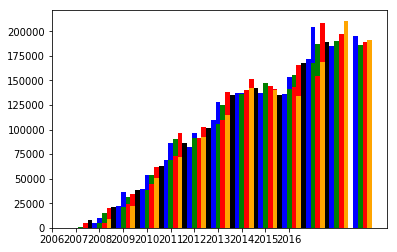

<Figure size 36000x21600 with 0 Axes>

In [271]:
plt.bar(x_year + 0.00, months[0], color = 'b', width = 0.2)
plt.bar(x_year + 0.20, months[1], color = 'g', width = 0.2)
plt.bar(x_year + 0.40, months[2], color = 'r', width = 0.2)
plt.bar(x_year + 0.60, months[3], color = 'black', width = 0.2)
plt.bar(x_year + 0.80, months[4], color = 'b', width = 0.2)
plt.bar(x_year + 1.00, months[5], color = 'g', width = 0.2)
plt.bar(x_year + 1.20, months[6], color = 'r', width = 0.2)
plt.bar(x_year + 1.40, months[7], color = 'orange', width = 0.2)
plt.bar(x_year + 1.80, months[8], color = 'b', width = 0.2)
plt.bar(x_year + 2.00, months[9], color = 'g', width = 0.2)
plt.bar(x_year + 2.20, months[10], color = 'r', width = 0.2)
plt.bar(x_year + 2.40, months[11], color = 'orange', width = 0.2)
plt.xticks(list(range(2006, 2017,1))) 
plt.figure(figsize=(500,300))

fig = plt.figure(figuresize=(400, 300))
plt.savefig('mon.png')

In [268]:
fig.savefig("months.pdf")

NameError: name 'fig' is not defined

In [273]:
plt.savefig('foo.png')

<Figure size 432x288 with 0 Axes>

# Summary

There were 17 millions from the public dataset and 5 types of comments were found;  
    (1) comment,  
    (2) story,  
    (3) job,   
    (4) pollopt and   
    (5) poll.   

Out of 17 millions, 14 millions are comments and tops the list. Total number of comments contributing to 17 millions posts are half a million (524,637) commenters. There are 17,108,307 news and 524,637 users on HackerNews. The user named 'tptacek' commented 45,249 posts, which is the highest posts in our data analysis. User named "mattmaroon" is actively involved in all types of texts in HackerNews. The user was involved in 4,674 comments, 5 posts in story, 2 posts in job, 3 posts in pollopt and 1 in poll, accounting for 4,685 posts in total. In contrast to our previous results where the most highly posted user 'tptacek' who made 44,879 posts did not show up in our 'across-the-board' analysis. This indicates that some users are not involved in other aspects of HackerNews and some users are only involved in certain types of posts.



### Note  
Since the user column was labeled as 'by', to avoid the clash, I named the table as t1 and called the user number by t1.by.  
In text column, there are empty rows, not **NULL** row. In order to remove those rows in my counting mode, I used t1.text <> "".

**Multi-table Joins**, superb for all users across all boards

```
SELECT
FROM
    (SELECT 
    FROM ) as t1
JOIN
    (SELECT 
    FROM ) as t2
ON 
t1 = t2
JOIN 
    (SELECT
    FROM ) as t3
ON
t1 = t3
```

FROM StackOverflow

```
SELECT TableA.*, TableB.*, TableC.*, TableD.*
FROM TableA
    JOIN TableB
        ON TableB.aID = TableA.aID
    JOIN TableC
        ON TableC.cID = TableB.cID
    JOIN TableD
        ON TableD.dID = TableA.dID
WHERE DATE(TableC.date)=date(now()) 
```

Or **Pivot Table** Superb for rolling out multiple rows (groups) into a single row

```
SELECT 
   SUM(CASE WHEN(t1.type ="comment") THEN 1 END) as comment,
   SUM(CASE WHEN(t1.type ="story") THEN 1 END) as story,
   SUM(CASE WHEN(t1.type ="job") THEN 1 END) as job
FROM table as t1
GROUP BY
   t1.user
```

When you query in CLI with a back slash, make sure there's no extra white space. It will throw an error. 
